In [47]:
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
data=pd.DataFrame()
for file in glob('singapore/*/listings.csv.gz'):
    data=pd.concat([data,pd.read_csv(file)])

/srv/conda/envs/notebook/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (42,43,61,62,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [127]:
data.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [131]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [129]:
data['property_type'].unique()

array(['Apartment', 'Villa', 'House', 'Townhouse', 'Other', 'Condominium',
       'Loft', 'Serviced apartment', 'Guest suite', 'Bed and breakfast',
       'Bungalow', 'Aparthotel', 'Hostel', 'Chalet', 'Guesthouse', 'Boat',
       'Boutique hotel', 'Hotel', 'Cabin', 'Tent', 'Campsite', 'Bus',
       'Farm stay', 'Castle', 'Tiny house', 'Heritage hotel (India)',
       'Earth house', 'Igloo', 'Cottage', 'Camper/RV', 'Treehouse',
       'Lighthouse', 'Casa particular (Cuba)'], dtype=object)

In [130]:
data['neighbourhood'].unique()

array(['Woodlands', 'Bukit Timah', 'Tampines', 'Bedok', 'Bukit Merah',
       'Central Area', 'Geylang', 'Jurong West', 'Tanglin',
       'Bugis/Kampong Glam', 'Queenstown', 'Serangoon', 'Katong',
       'Pasir Ris', 'Toa Payoh', 'Chinatown', 'Punggol', 'Hougang',
       'Novena', 'Bukit Panjang', 'Kallang', 'Marine Parade',
       'Ang Mo Kio', 'Bukit Batok', 'Choa Chu Kang', 'Orchard',
       'Sembawang', 'Jurong East', 'Clementi', 'Sengkang', 'Arab Street',
       'Bishan', 'Riverside', 'Yishun', 'Marina Bay', 'Mount Faber',
       'Mandai', 'Sentosa', 'Sungei Kadut', 'Little India', nan,
       'Keppel Bay', 'Holland Village', 'HarbourFront', 'Pioneer',
       'Dempsey', 'Paya Lebar', 'Boon Lay', 'Changi'], dtype=object)

In [167]:
# Convert Price column to number
data['price'] = data['price'].str.replace('[$,]','').astype(float)

In [169]:
countlisting = data.groupby(['property_type','calendar_last_scraped']).agg({'id':'count','price':'mean'}).reset_index()
countlisting.rename(columns={'id': 'count'},inplace=True)
countlisting.head()

,property_type,calendar_last_scraped,count,price
0,Aparthotel,2019-03-18,4,54.250000
1,Aparthotel,2019-04-20,4,54.250000
2,Aparthotel,2019-05-23,14,234.285714
3,Aparthotel,2019-06-25,14,234.857143
4,Aparthotel,2019-07-21,14,236.428571


In [181]:
data.groupby(['host_id','calendar_last_scraped']).agg({'property_type':lambda x: len(set(x)),'price':'mean'}).reset_index()

,host_id,calendar_last_scraped,property_type,price
0,23666,2019-03-18,1,108.0
1,23666,2019-04-20,1,108.0
2,23666,2019-06-25,1,108.0
3,23666,2019-07-21,1,107.0
4,23666,2019-08-28,1,108.0
...,...,...,...,...
37611,342733095,2020-04-26,1,77.0
37612,342940704,2020-04-26,1,649.0
37613,343559915,2020-04-26,1,300.0
37614,343605079,2020-04-26,1,165.0


In [145]:
## Refactor with Python 3.5, dictionary unpacking

from collections import ChainMap

values = [{x:y} for x,y in zip(sorted(countlisting.calendar_last_scraped.unique()),range(len(countlisting.calendar_last_scraped.unique())))]
countlisting['calendar_last_scraped'] = countlisting['calendar_last_scraped'].replace(dict(ChainMap(*values)))


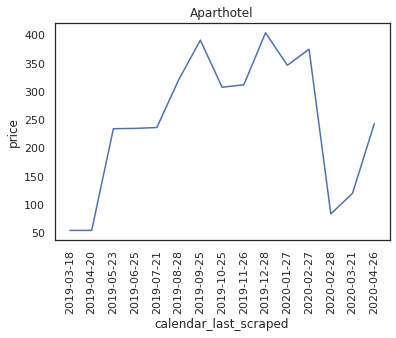

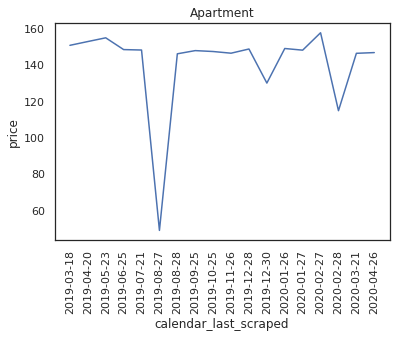

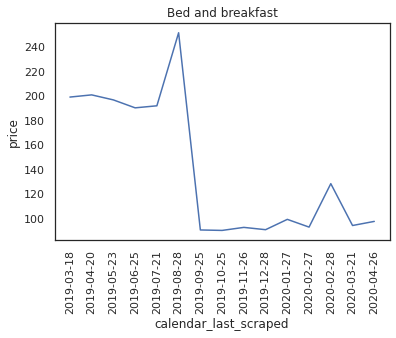

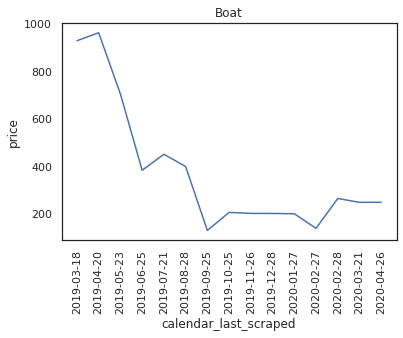

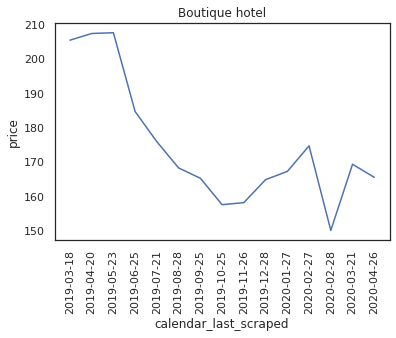

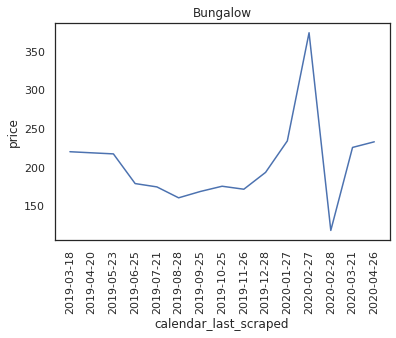

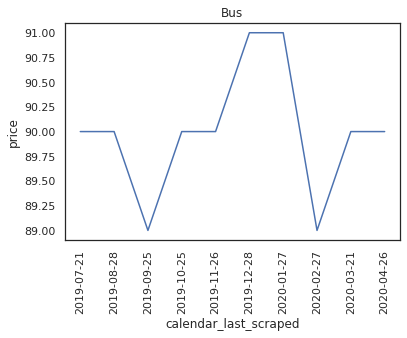

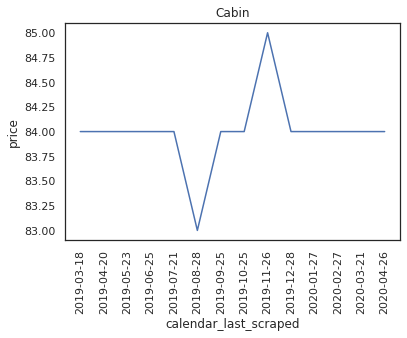

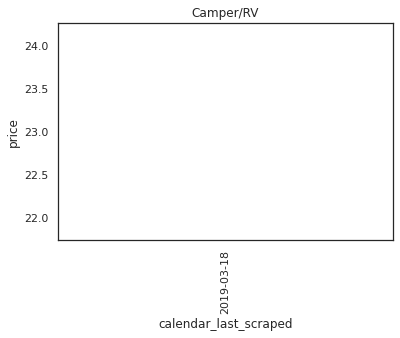

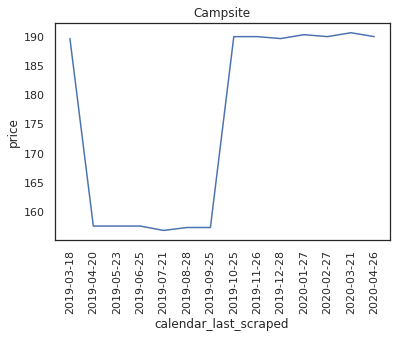

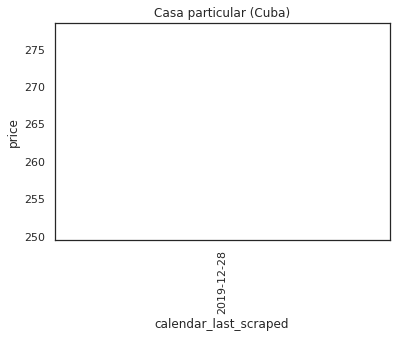

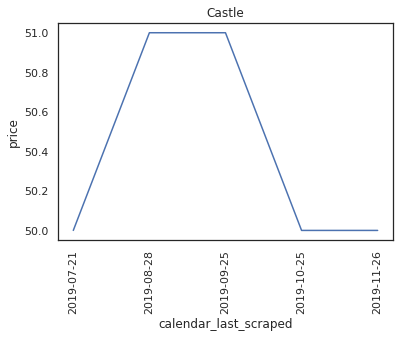

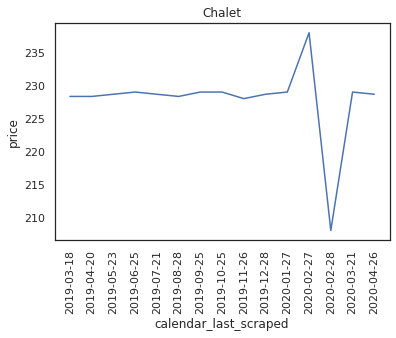

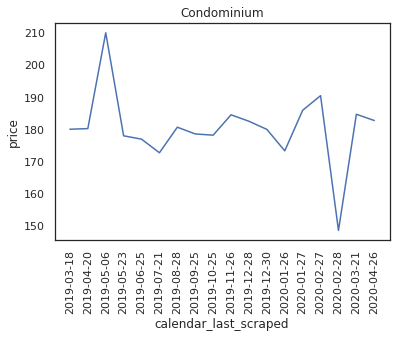

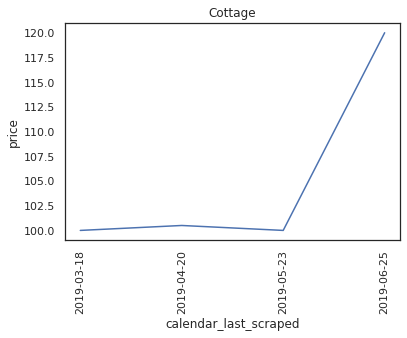

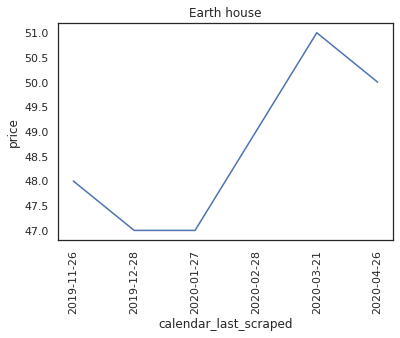

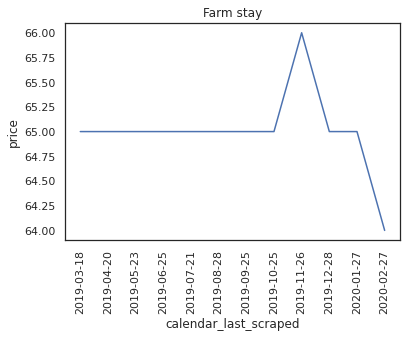

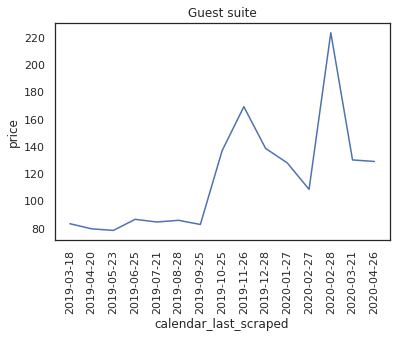

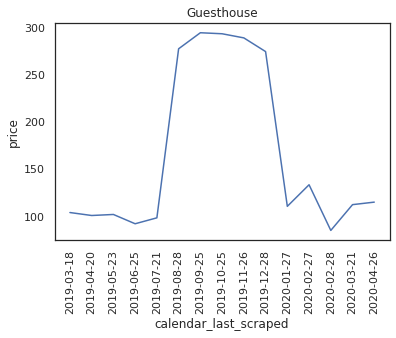

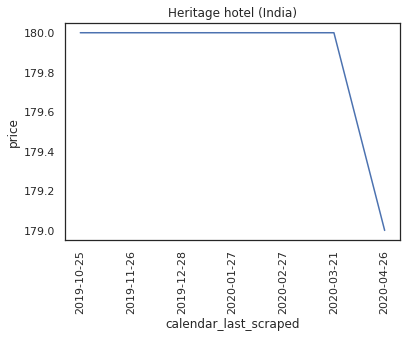

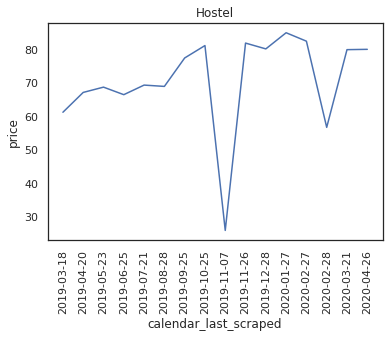

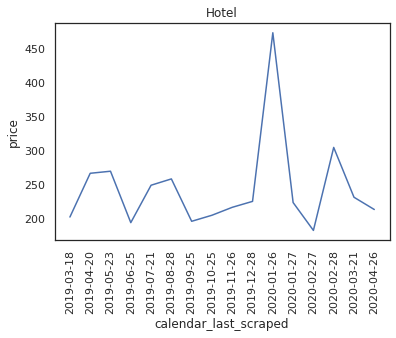

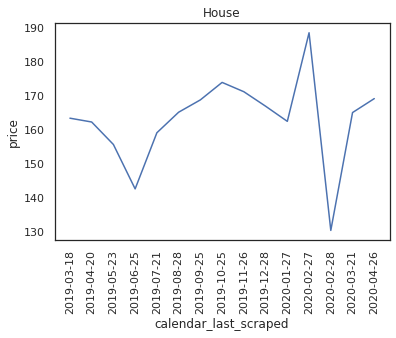

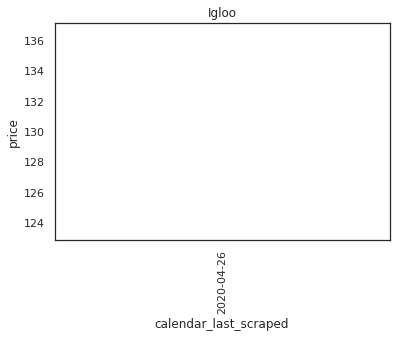

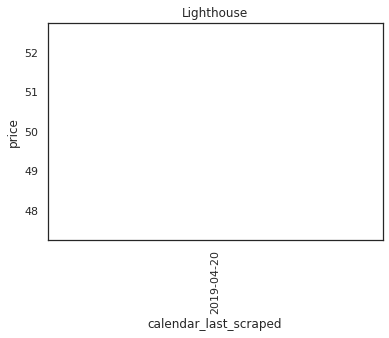

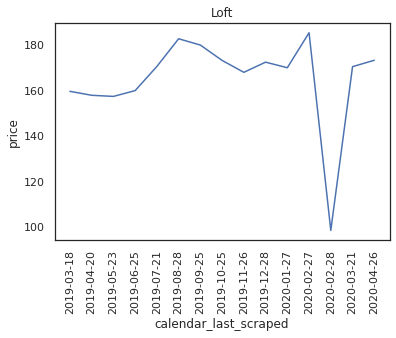

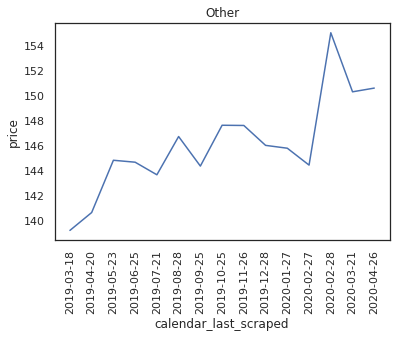

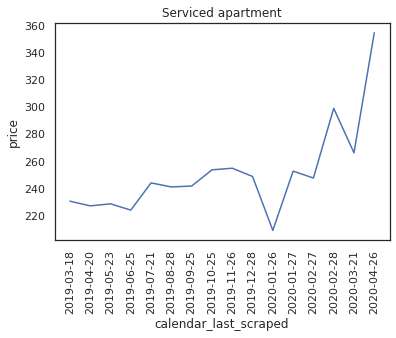

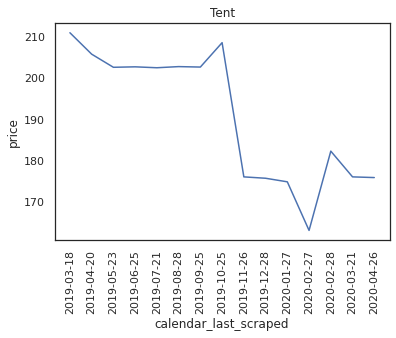

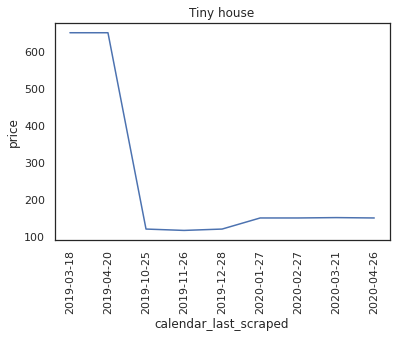

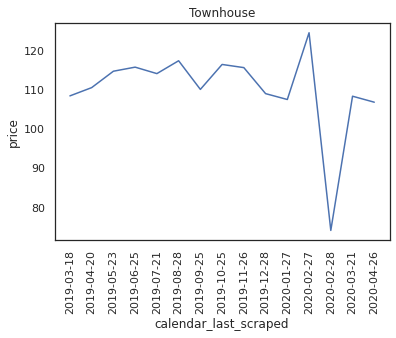

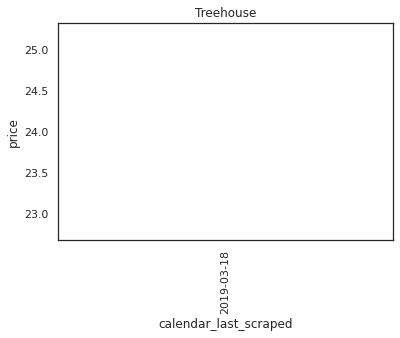

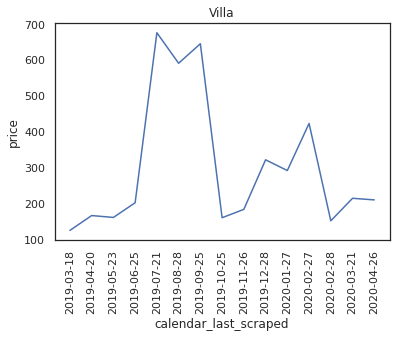

In [170]:
for type in countlisting['property_type'].unique():
    plt.title(type)
    sns.lineplot(x='calendar_last_scraped',y='price',data=countlisting.loc[countlisting.property_type == type],legend=False)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
## Avg Hostel, Others and Service Apartment Prices went up during covid

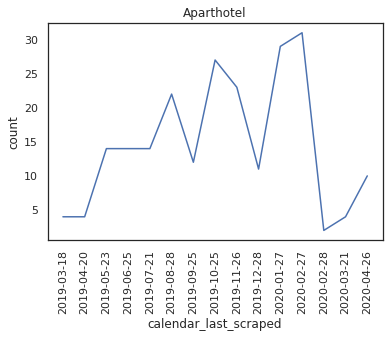

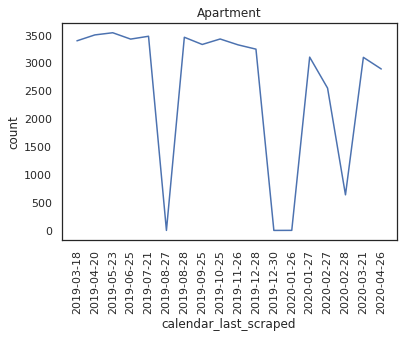

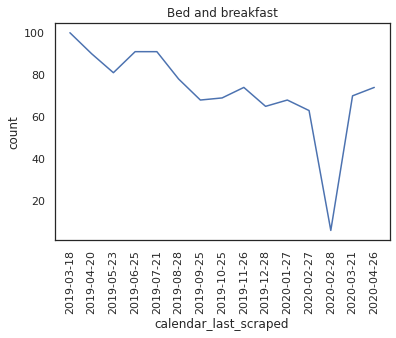

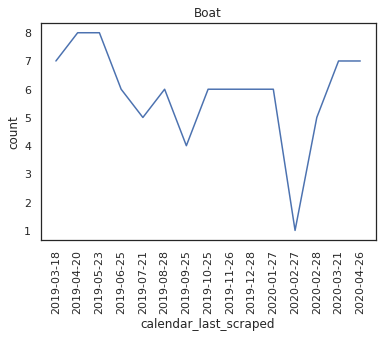

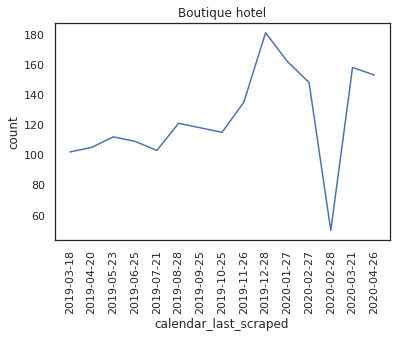

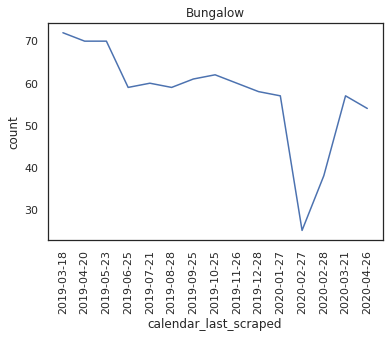

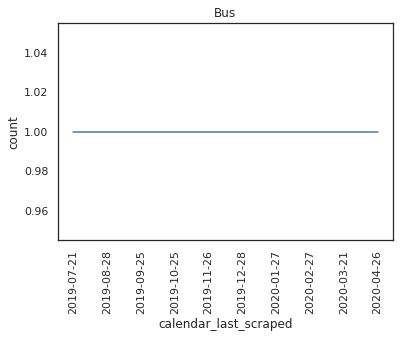

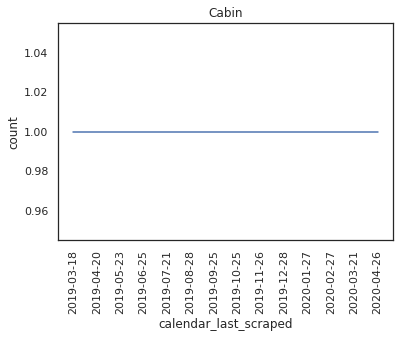

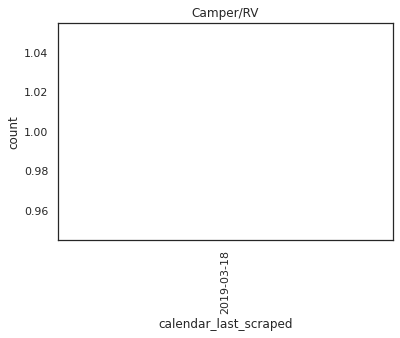

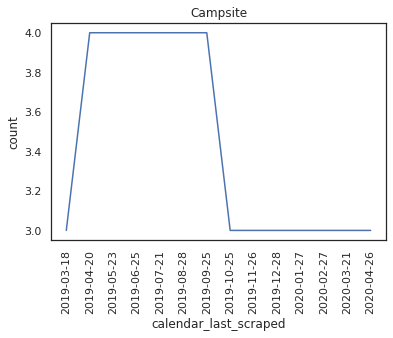

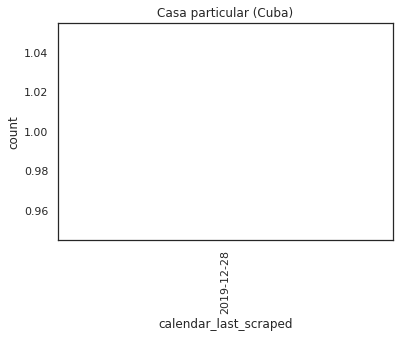

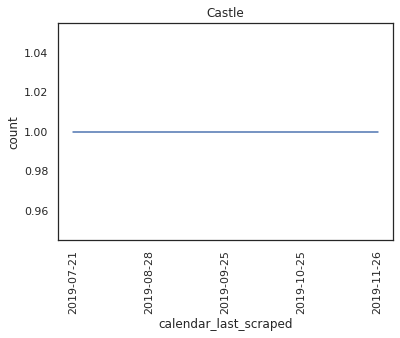

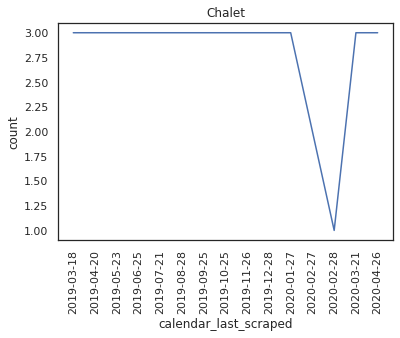

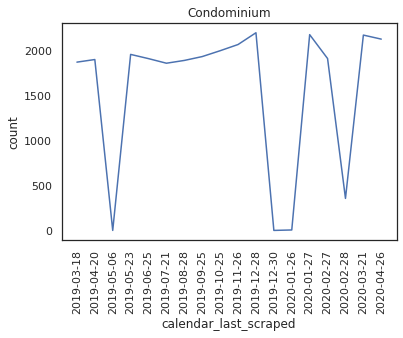

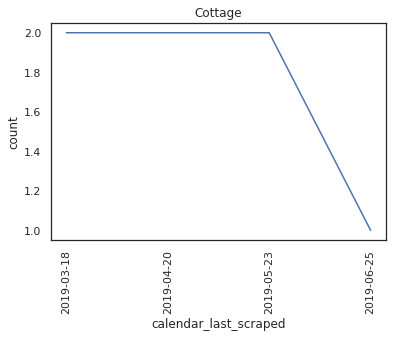

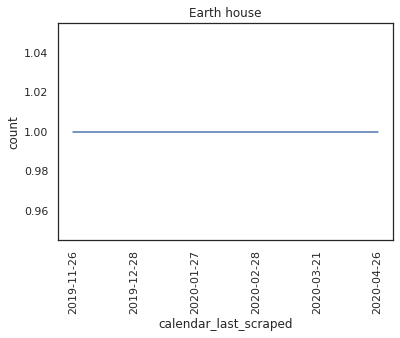

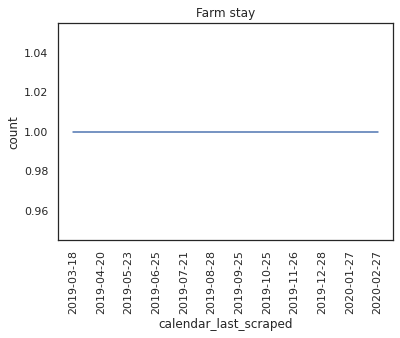

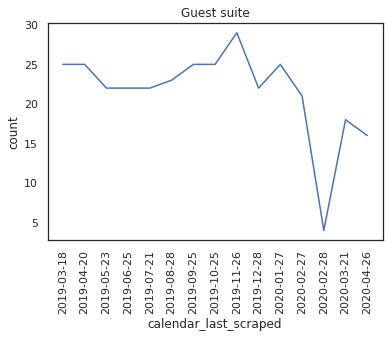

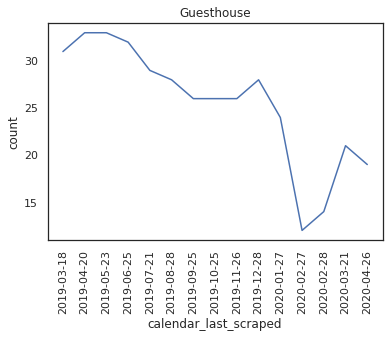

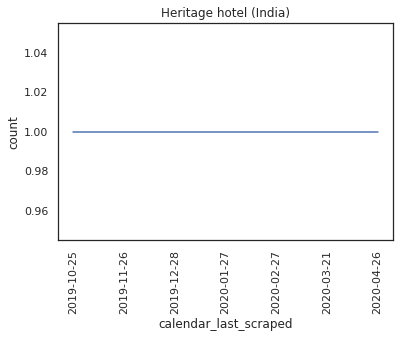

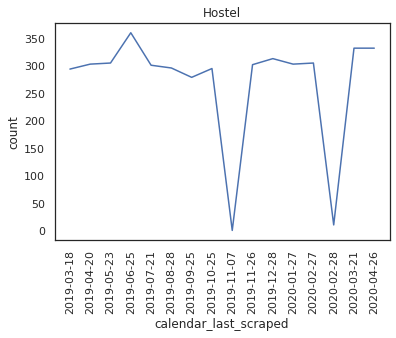

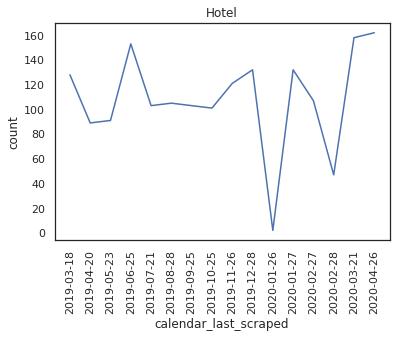

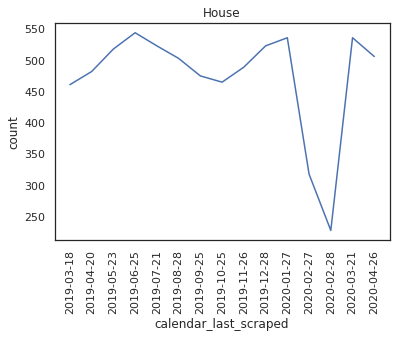

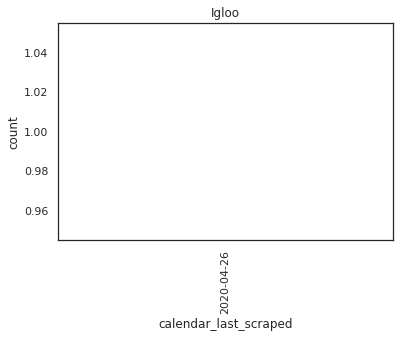

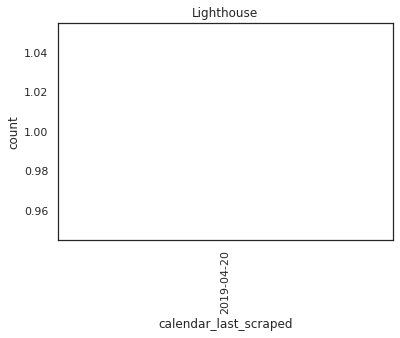

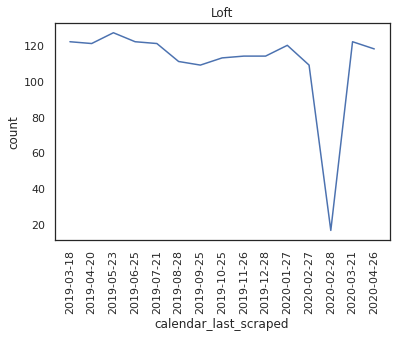

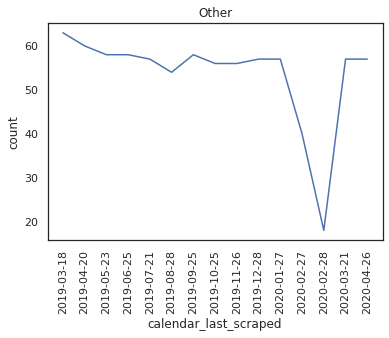

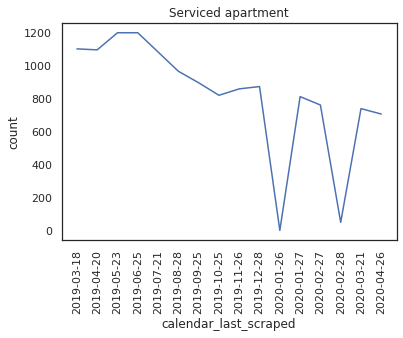

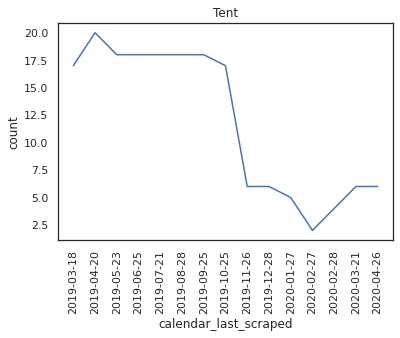

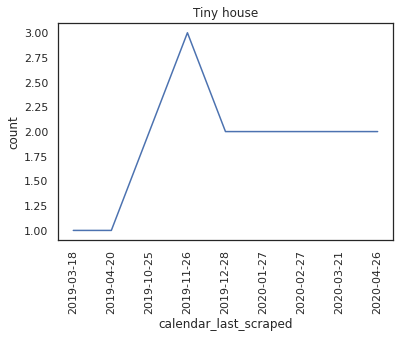

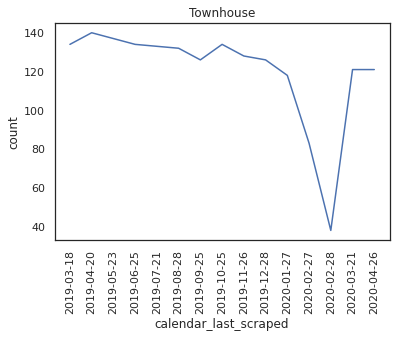

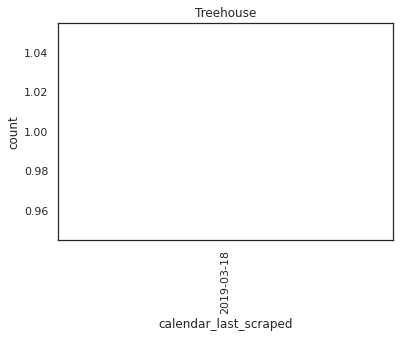

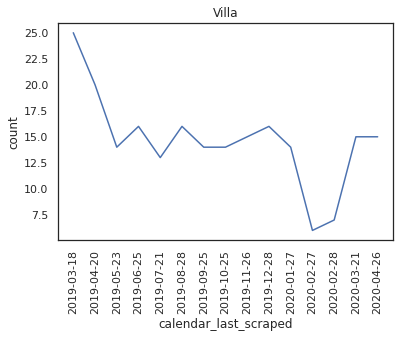

In [156]:
for type in countlisting['property_type'].unique():
    plt.title(type)
    sns.lineplot(x='calendar_last_scraped',y='count',data=countlisting.loc[countlisting.property_type == type],legend=False)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
# Number of Service Apartment listing came down

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()
/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


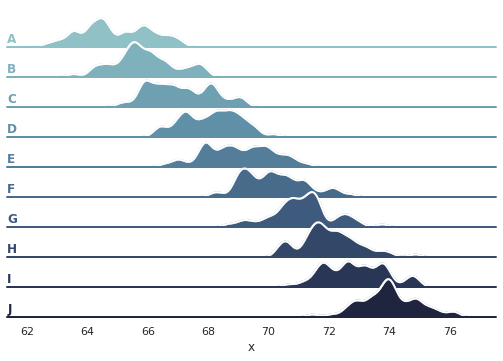

In [98]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


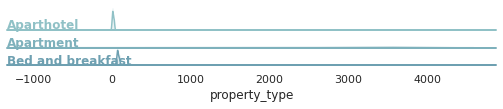

In [97]:

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="property_type", hue="property_type", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.distplot, "count", )
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "property_type")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)